## **作业10A：基于LRFMC模型的航空公司客户价值聚类分析**
文件【air_data】中存放了数万条航空公司乘客信息(无重复乘客数据)，每条数据包括40多个属性。对应的主要属性含义如下图：
![](../images/10A01.png)  
基于上述数据，设计一个聚类模型，使之能将这些乘客归到不同的类别中

### **任务1：装载并提取关键数据**
提取下列6个属性数据，组成精简的特征数组：
* FFP_DATE：入会时间
* LOAD_TIME：观测窗口的结束时间
* FLIGHT_COUNT：飞行次数(在观测窗口时间内)
* avg_discount：平均折扣率
* SEG_KM_SUM：总飞行公里数(在观测窗口时间内)
* LAST_TO_END：最后一次乘机时间至观测窗口结束点的时长

In [1]:
import numpy as np
import pandas as pd

file_name = 'air_data.csv'
origin_data = pd.read_csv(file_name, encoding='utf-8')
print("原始数据维度：", origin_data.shape)

# 选择FFP_DATE、LOAD_TIME、FLIGHT_COUNT、avg_discount、SEG_KM_SUM、LAST_TO_END 6个属性
columns = ['FFP_DATE','LOAD_TIME','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']
refined_data = origin_data[columns]
print("精简数据维度：", refined_data.shape)

原始数据维度： (62292, 45)
精简数据维度： (62292, 6)


### **任务2：生成LRFMC特征矩阵**
* **入会至当前时长 L** = LOAD_TIME - FFP_DATE   (反映可能的活跃时长)   
会员入会时间距观测窗口结束的月数 = 观测窗口的结束时间 - 入会时间 [ 单位：月 ]
* **最近消费时间间隔 R** = LAST_TO_END  (反映最近一段时间活跃程度)  
客户最近一次乘坐公司飞机距离观测窗口结束的月数 = 最后一次乘机时间至观测窗口末端时长 [ 单位：月 ]
* **消费频次 F** = FLIGHT_COUNT   (反映乘客的忠诚度)  
客户在观测窗口内乘坐公司飞机的次数 = 观测窗口的飞行次数 [ 单位：次 ]
* **消费里程总额 M** = SEG_KM_SUM  (反映乘客对乘机的依赖程度)  
客户在观测时间内在公司累计的飞行历程 = 观测窗口的总飞行公里数 [ 单位：公里 ]
* **舱位等级对应的折扣系数 C** = AVG_DISCOUNT  (一般舱位等级越高，折扣系数越大)  
客户在观测时间内乘坐舱位所对应的折扣系数的平均值 = 平均折扣率 [ 单位：无 ]

In [8]:
# 将上述6个属性转换成LRFMC指标，每个指标作为1列数据追加到refined_data矩阵中
refined_data.loc[:, 'L'] = (pd.to_datetime(refined_data['LOAD_TIME']) - pd.to_datetime(refined_data['FFP_DATE'])) / 30
refined_data.loc[:, 'R'] = refined_data['LAST_TO_END'] / 30
refined_data.loc[:, 'F'] = refined_data['FLIGHT_COUNT']
refined_data.loc[:, 'M'] = refined_data['SEG_KM_SUM']
refined_data.loc[:, 'C'] = refined_data['avg_discount']
lrfmc_data = refined_data[['L','R','F','M','C']]
print("LRFMC数据集前5条数据：")
print(lrfmc_data.head(5))

LRFMC数据集前5条数据：
                 L         R    F       M         C
0 90 days 04:48:00  0.033333  210  580717  0.961639
1 86 days 13:36:00  0.233333  140  293678  1.252314
2 87 days 04:00:00  0.366667  135  283712  1.254676
3 68 days 05:36:00  3.233333   23  281336  1.090870
4 60 days 12:48:00  0.166667  152  309928  0.970658


### **任务3：数据归一化处理**

In [9]:
# 归一化处理
normalized_data = (lrfmc_data - lrfmc_data.mean(axis=0)) / lrfmc_data.std(axis=0)
normalized_data.columns = 'Z' + normalized_data.columns    # 列标题之前追加字符'Z'，表示是进行了归一化处理的列数据
print("归一化数据集前5条数据：")
print(normalized_data.head(5))

归一化数据集前5条数据：
         ZL        ZR         ZF         ZM        ZC
0  1.437337 -0.947610  14.054556  26.798659  1.296475
1  1.308764 -0.914510   9.087224  13.146340  2.868685
2  1.329997 -0.892444   8.732414  12.672331  2.881455
3  0.660006 -0.418019   0.784683  12.559322  1.995459
4  0.387527 -0.925544   9.938766  13.919232  1.345256


### **任务4：训练聚类模型**
按照TODO中的提示完成代码：

In [10]:
# 执行聚类
from sklearn.cluster import KMeans
k = 5    # 设置的分类数量
model = None

### TODO:创建KMeans对象，并赋给变量model。使用model训练聚类模型




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### **任务5：检查聚类结果**
聚类中心点反映了该类别下样本的平均值

In [17]:
# 统计聚类的每个标签，各有多少个关联的样本点
series1 = pd.Series(model.labels_).value_counts()
print("每个聚类类别的样本数量：\n", series1)
# 统计每个聚类类别的中心点
series2 = pd.DataFrame(model.cluster_centers_)
print("每个聚类类别的中心点：\n", series2)
# 整合统计数据
print("聚类个数及中心点统计：")
stats= pd.concat([series1,series2], axis=1)
stats.columns = ['聚类个数'] + list(normalized_data.columns)
print(stats)

每个聚类类别的样本数量：
 0    24773
2    15788
3    12179
1     5343
4     4209
dtype: int64
每个聚类类别的中心点：
           0         1         2         3         4
0 -0.699567 -0.414003 -0.161025 -0.160808 -0.256000
1  0.484868 -0.801675  2.487117  2.428455  0.310348
2  1.161917 -0.377088 -0.086262 -0.094252 -0.154787
3 -0.314036  1.683256 -0.572875 -0.535827 -0.173351
4  0.051279 -0.003016 -0.227978 -0.232012  2.187512
聚类个数及中心点统计：
    聚类个数        ZL        ZR        ZF        ZM        ZC
0  24773 -0.699567 -0.414003 -0.161025 -0.160808 -0.256000
1   5343  0.484868 -0.801675  2.487117  2.428455  0.310348
2  15788  1.161917 -0.377088 -0.086262 -0.094252 -0.154787
3  12179 -0.314036  1.683256 -0.572875 -0.535827 -0.173351
4   4209  0.051279 -0.003016 -0.227978 -0.232012  2.187512


### **任务6：分析聚类结果**
* 每个聚类都包含聚类中心点五个维度值(ZL、ZR、ZF、ZM、ZC)，每个维度都代表了该聚类下所有样本点的取值倾向
  * 维度值为正数，表明该聚类样本点的取值普遍大于所有样本点的平均值；维度值越大，超过平均值越多
  * 维度值为负数，表明该聚类样本点的取值普遍小于所有样本点的平均值；维度值越小，低于平均值越多
  * 对于指标ZL、ZF、ZM、ZC，这些数据值越大，就越说明该类别的乘客值得重视
  * 而对于指标ZR，该值越大，说明上次乘坐间隔时间越长，其重要程度就越小
* 作出5个聚类的聚类中心点在每个维度上的散点图，并按同一类别连接起来，可得到类似于下图的结果：  
  ![](../images/10A02.png)   
* 结合上图分析如下：
  * 聚类0(红线)：L较大，说明入会时间长；但其它值都比较低，说明不活跃，也不高端。这类乘客可划入【重要挽留】类，防止其流失
  * 聚类1(绿线)：入会时间特别短，距离最近一次乘坐的时间却并不久远，看不出其潜力。这类乘客可划入【普通】类
  * 聚类2(黄线)：最近一次乘坐离当前时间久远，且其它指标都很低。这类乘客可能只是偶尔乘坐，可划入【低价值】类
  * 聚类3(蓝线)：C很大，说明折扣大(也就是说舱位等级高)；但入会时间不长，频率和里程低。这类乘客可划入【重要发展】类，提升其乘坐次数
  * 聚类4(黑线)：R很小，且L和M很高，说明经常乘坐飞机。这类乘客是【重点保持】类，是航空公司的主要客流，要优先保障

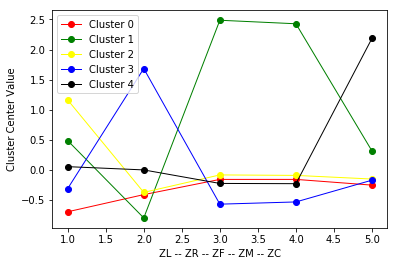

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

centers = model.cluster_centers_  
x = [1,2,3,4,5]  
colors = ['red','green','yellow','blue','black']  
for i in range(5): 
    plt.plot(x, centers[i], label='Cluster '+str(i), linewidth=1, color=colors[i], marker='o')   
plt.xlabel('ZL -- ZR -- ZF -- ZM -- ZC')  
plt.ylabel('Cluster Center Value')  
plt.legend()
plt.show()  